<a href="https://colab.research.google.com/github/amargauge26/logistic_reg_spam_ham/blob/main/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/SAMPLE_DATASETS/modelsdatasets/spam.csv',encoding='ISO-8859-1')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#clean

data = data[["v1","v2"]].copy()

In [7]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
data.rename(columns={"v1":"class","v2":"text"},inplace=True)

In [9]:
data

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
data["target"]=data["class"].map({"ham":0,"spam":1})

In [12]:
data

,class,text,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [14]:
new_data=data[["target","text"]]

In [15]:
new_data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [17]:
new_data.duplicated().sum()

403

In [18]:
new_data.drop_duplicates(inplace=True)

<ipython-input-18-d6326b9f71c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop_duplicates(inplace=True)


In [21]:
new_data.duplicated().sum()

0

In [22]:
new_data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [28]:
"""new_data["target"].value_counts.plot(kind="bar")
plt.xlabel('Target')
plt.title('spam:1 and ham:0')
plt.show()"""

'new_data["target"].value_counts.plot(kind="bar")\nplt.xlabel(\'Target\')\nplt.title(\'spam:1 and ham:0\')\nplt.show()'

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
ps=PorterStemmer

In [45]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def trans_data(data):
    data = data.lower()
    data = nltk.word_tokenize(data)

    y = []
    for i in data:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [46]:
trans_data("i am going to the market ")

'go market'

In [47]:
new_data["trans_text"]= new_data.text.apply(trans_data)

<ipython-input-47-bfcb383790a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["trans_text"]= new_data.text.apply(trans_data)


In [48]:
new_data

,target,text,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [54]:
spam_corpus=[]
for msg in new_data[new_data['target']==1]["trans_text"].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [58]:
len(spam_corpus)

9939

In [61]:
ham_corpus = []
for msg in new_data[new_data['target']==0]['trans_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [62]:
len(ham_corpus)

35404

In [63]:
#model

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [65]:
new_data

,target,text,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [66]:
new_data.reset_index(inplace=True)

In [67]:
new_data

,index,target,text,trans_text
0,0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...,...
5164,5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...
5165,5568,0,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5166,5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5167,5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [69]:
X = cv.fit_transform(new_data['trans_text']).toarray()
y=new_data['target'].values

In [75]:
len(X[0])

6708

In [72]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix ,precision_score , recall_score

In [79]:
params={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
gs=GridSearchCV(log_clf,params,cv=3,verbose=3)

In [80]:
gs.fit(X_train,y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV 1/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.1s
[CV 2/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.1s
[CV 3/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.1s
[CV 1/3] END ...............C=0.001, penalty=l2;, score=0.877 total time=   0.3s
[CV 2/3] END ...............C=0.001, penalty=l2;, score=0.877 total time=   0.3s
[CV 3/3] END ...............C=0.001, penalty=l2;, score=0.877 total time=   0.3s
[CV 1/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.1s
[CV 2/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.1s
[CV 3/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.1s
[CV 1/3] END ................C=0.01, penalty=l2;, score=0.885 total time=   0.4s
[CV 2/3] END ................C=0.01, penalty=l2;, score=0.890 total time=   0.4s
[CV 3/3] END ................C=0.01, penalty=l2;

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [81]:
gs.best_score_

0.9799278555623734

In [82]:
gs.best_params_

{'C': 1000.0, 'penalty': 'l2'}

In [83]:
y_pred=gs.predict(X_test)

In [84]:
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 96.99%
Recall: 88.97%


In [85]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[885,   4],
       [ 16, 129]])

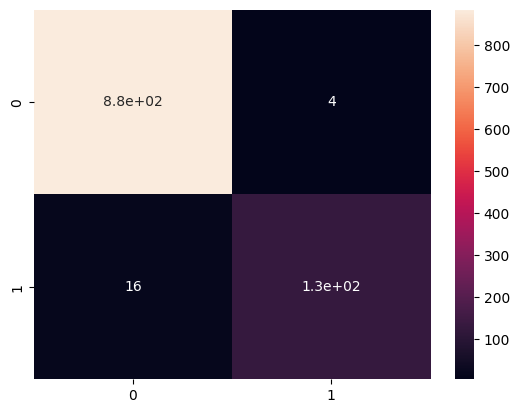

In [89]:
sns.heatmap(cm,annot=True)
plt.show()

In [118]:
# Sample message
message = "sir you are joke"

In [119]:
transformed_message = trans_data(message)

In [120]:
transformed_message

'sir joke'

In [121]:
message_vector = cv.transform([transformed_message]).toarray()

In [122]:
message_vector

array([[0, 0, 0, ..., 0, 0, 0]])

In [123]:
prediction = gs.predict(message_vector)

In [124]:
probability = gs.predict_proba(message_vector)


In [129]:
# Print results
print("Message:", message)
print("Prediction:", "SPAM" if prediction[0] == 1 else "HAM")
print("Probability of being spam:", probability[0][1])

Message: sir you are joke
Prediction: HAM
Probability of being spam: 4.279738494770914e-06


In [130]:
test_messages = [
    "Hello, how are you?",
    "WIN FREE MONEY NOW!!!",
    "Meeting at 3pm tomorrow",
    "Claim your prize of $1000000"
]

# Transform and predict
test_vectors = cv.transform(test_messages)
predictions = gs.predict(test_vectors)
probabilities = gs.predict_proba(test_vectors)

# Print predictions
for msg, pred, prob in zip(test_messages, predictions, probabilities):
    print(f"\nMessage: {msg}")
    print(f"Prediction: {'SPAM' if pred == 1 else 'HAM'}")
    print(f"Probability of being spam: {prob[1]:.4f}")


Message: Hello, how are you?
Prediction: HAM
Probability of being spam: 0.0029

Message: WIN FREE MONEY NOW!!!
Prediction: SPAM
Probability of being spam: 0.6405

Message: Meeting at 3pm tomorrow
Prediction: HAM
Probability of being spam: 0.0000

Message: Claim your prize of $1000000
Prediction: SPAM
Probability of being spam: 0.9930


In [131]:
import joblib

# Save the model
joblib.dump(gs, 'spam_classifier_model.pkl')

['spam_classifier_model.pkl']